<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/SF_movies_visualization_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite
#Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´„ÄÄÔºàwordcloud„Å™„Å©„ÅßÂèØË¶ñÂåñ„Åô„Çã„Åü„ÇÅÔºâ
!apt-get -y install fonts-ipafont-gothic

!pip install neologdn 
#ÂçäËßí„ÇíÂÖ®Ëßí„Å´Â§âÊèõ
!pip install mojimoji

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.1MB 3.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=788bb9c93df76191aadf0c0ba4b6c893b4fe5eaacddf4831062b609c32ad2199
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns 


In [78]:
path = "/content/drive/My Drive/movie_research/review_csv/SF_data.csv"
data = pd.read_csv(path) 

In [79]:
#Êï∞ÂÄ§„Ç´„É©„É†„Å´Â§âÊèõ„Åô„Çã
def prepro(df, col):
  df = df.copy() 
  df[col] = df[col].replace('-','-1') #ÂõûÁ≠î„Åó„Å¶„Å™„ÅÑ‰∫∫„Çí-1„ÅßÂüã„ÇÅ„Çã
  df[col] = df[col].astype(float)

  return df

In [80]:
def round_score(df):
  df["score"] = df["score"]*2.0
  df["score"] = df["score"].round() / 2.0

  return df

In [81]:
data = prepro(data, "score")

data = data[data["score"] != -1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


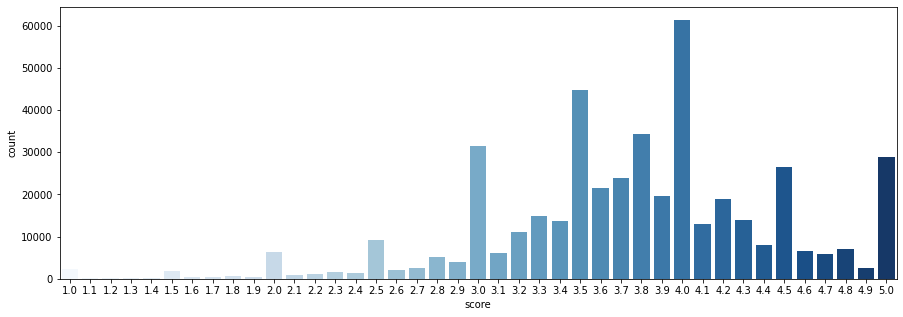

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(data["score"].sort_values(), palette='Blues')

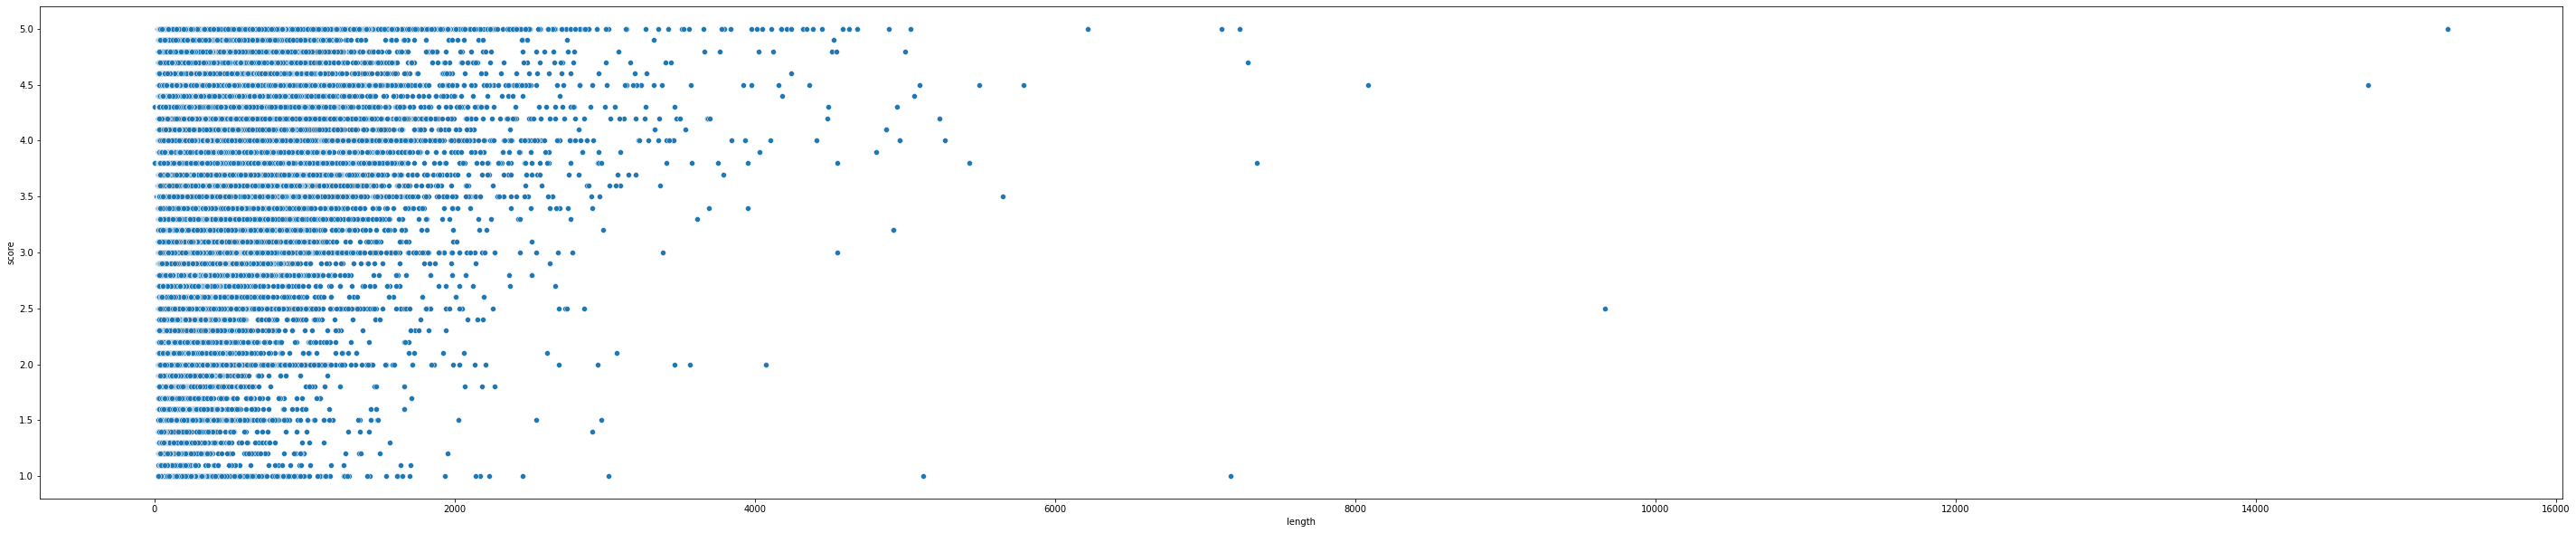

In [83]:
#ÊñáÂ≠óÊï∞„ÇíÂèØË¶ñÂåñ
data["length"] = data["review"].apply(lambda x: len(x))
plt.figure(figsize=(50, 10))
sns.scatterplot(y=data["score"].sort_values(), x=data["length"], palette='YlOrBr')

In [84]:
data.query('500 > length > 100').__len__() 

192658

In [85]:
data.query('100 > length > 10').__len__() 

240159

In [86]:
data.query('10 >= length').__len__() 

2

In [87]:
#„É¨„Éì„É•„Éº„ÅåÊõ∏„Åã„Çå„Å¶„ÅÑ„Å™„ÅÑ„ÅÆ„ÇÇ„ÅÇ„Çã
data.query('10 >= length')

title  ... length
56933   „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...      1
475448    Á¨¨9Âú∞Âå∫|District 9  ...      1

[2 rows x 7 columns]

In [88]:
data.query('20 >= length > 10')

title  ... length
61617    „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...     18
129130         „Ç¨„Çø„Ç´|Gattaca  ...     19
178460  „Çπ„Çø„Éº„Éª„Éà„É¨„ÉÉ„ÇØ|Star Trek  ...     15

[3 rows x 7 columns]

In [89]:
data.query('30 >= length > 20')

title  ... length
81                    12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     30
147                   12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     30
155                   12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     30
199                   12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     29
252                   12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     30
...                                      ...  ...    ...
483861         ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX „Éï„Ç°„Éº„Çπ„Éà„Ç≥„É≥„Çø„ÇØ„Éà|The Thing  ...     30
483936         ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX „Éï„Ç°„Éº„Çπ„Éà„Ç≥„É≥„Çø„ÇØ„Éà|The Thing  ...     30
483981         ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX „Éï„Ç°„Éº„Çπ„Éà„Ç≥„É≥„Çø„ÇØ„Éà|The Thing  ...     29
484242  È≠îÁïåÊé¢ÂÅµ„Ç¥„Éº„Ç¥„É™II È≠îÂ•≥„ÅÆÂë™„ÅÑ„Å®Â¶ñÊÄ™„É¥„Ç£„Éº„ÅÆÂè¨Âñö|Gogol. Viy  ...     30
484262                 ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...     30

[10316 rows x 7 columns]

In [106]:
import neologdn 
import string 
import mojimoji 
import re 

def text_preprocess(text):

  text = neologdn.normalize(text)
  #URL„ÇíÈô§Âéª„Åô„Çã
  text = re.sub(
      r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?', 
      "",
      text)
  #ÂÖ®Ëßí„Åã„ÇâÂçäËßí„Å´
  text = mojimoji.zen_to_han(text) 

  #3D,2D„ÇíÊÆã„Åó„Åü„ÅÑ
  text = text.replace('3D','‰∏âÊ¨°ÂÖÉ')
  text = text.replace('2D','‰∫åÊ¨°ÂÖÉ')

  #Êï∞Â≠ó„Çí„Åô„Åπ„Å¶0„Å´ÁΩÆÊèõ 
  text = re.sub(r'\d+', '0', text)
  text = re.sub(r'[0]+', '0', text)

  #string.punctuation„ÅÆÈô§Âéª
  table = str.maketrans('', '', string.punctuation)
  text = text.translate(table) 

  text = text.replace("ÔΩ°",'')
  text = text.replace("„ÄÇ",'')
  text = text.replace("Ôºå",'')
  text = text.replace(",",'')
  text = text.replace("„ÄÅ",'')
  text = text.replace("ÔΩ§",'')
  text = text.replace("‚Ä¶",'')
  text = text.replace("ÔΩ•",'')
  

  # „Äê„Äë„ÅÆÈô§Âéª
  text = re.sub(r'[„Äê„Äë]', '', text)
  # ÔºàÔºâ„ÅÆÈô§Âéª
  text = re.sub(r'[ÔºàÔºâ()]', '', text)
  # ÔºªÔºΩ„ÅÆÈô§Âéª
  text = re.sub(r'[ÔºªÔºΩ\[\]]', '', text)
  #„Ç¢„É´„Éï„Ç°„Éô„ÉÉ„Éà„Çí„ÅÆÂ§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
  text = text.lower()

  #ÊîπË°å„Ç≥„Éº„Éâ„ÅÆÈô§Âéª
  text = text.replace('\n', '')
  text = text.replace('\r\n','')
  
  #Á©∫ÁôΩ„ÇíÈô§Âéª
  #ÂÖ®Ëßí„Çπ„Éö„Éº„Çπ
  text = text.replace('\u3000','')
  #„Çø„Éñ„Ç≠„Éº
  text = text.replace('\t','')
  #ÂçäËßí
  #text = re.sub(r' ','', text) ‚ÜíËã±Â≠óÂπï„Å™„Å©„ÅÆÊåáÊëò„ÇÇ„ÅÇ„Çã„Åü„ÇÅÂæå„ÅßË°å„ÅÜ
  
  return text

In [107]:
!pip install emoji 
!pip install nagisa 
#!pip install unicodedata 

import emoji
import nagisa

def delete_emoji(text):
  target_list = [w for w in text if w in emoji.UNICODE_EMOJI]
  for trg in target_list:
    text = text.replace(trg, "")
  return text 

In [108]:
data["review"] = data["review"].apply(text_preprocess) 
data["review"] = data["review"].apply(delete_emoji)

In [109]:
data["length"] = data["review"].apply(lambda x: len(x))

In [110]:
pd.set_option('display.max_rows', 50)

In [111]:
print("10ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : {}".format(data.query("length < 10").__len__()))
data.query('length < 10').sample(10)

10ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : 275


title  ... length
96281   „Ç®„Ç§„É™„Ç¢„É≥VS. „Éó„É¨„Éá„Çø„Éº|AVP: Alien vs. Predator  ...      0
157276                       „Ç∂„Éª„Éà„É©„É≥„Çπ„Éï„Ç©„Éº„É†|Hornet  ...      0
323880         „Éñ„É¨„Éº„Éâ„É©„É≥„Éä„Éº 2049|Blade Runner 2049  ...      0
312083                  „Éñ„É©„ÉÉ„ÇØ„Éë„É≥„Çµ„Éº|Black Panther  ...      0
424587             „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...      0
331381   „Éó„É≠„Éà„Çø„Ç§„Éó„Éª„Éû„Éä„ÄÄÂà∂Âæ°‰∏çËÉΩ|Ctrl Alt DeleteÔºèHacked  ...      0
451684                                ÊôÇ„Çí„Åã„Åë„ÇãÂ∞ëÂ•≥|  ...      2
331968                       „Éó„É≠„É°„ÉÜ„Ç¶„Çπ|Prometheus  ...      0
162495                 „Ç∏„É•„Éî„Çø„Éº|Jupiter Ascending  ...      0
191312                        „Çº„É≠„Éª„Ç∞„É©„Éì„ÉÜ„Ç£|Gravity  ...      9

[10 rows x 7 columns]

ÂâçÂá¶ÁêÜ„Åó„ÅüÁµêÊûúÔºå„É¨„Éì„É•„ÉºÊÉÖÂ†±„ÅåÊ∂à„Åà„Å¶„Åó„Åæ„ÅÜ„Ç¢„Ç´„Ç¶„É≥„Éà„ÅåÁµêÊßã„ÅÇ„Çã„Åì„Å®„ÅåÂàÜ„Åã„Çã

In [115]:
print("1ÊñáÂ≠ó‰ª•‰∏ä10ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : {}".format(data.query("length < 10").__len__()))
data.query("10 > length > 1").sample(50)                                    

1ÊñáÂ≠ó‰ª•‰∏ä10ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : 275


title  ... length
86803                        „Ç§„É≥„Éá„Éö„É≥„Éá„É≥„Çπ„Éª„Éá„Ç§|Independence Day  ...      9
381453                                      „É°„ÉÉ„Çª„Éº„Ç∏|Arrival  ...      4
137453  „Ç¨„Éº„Éá„Ç£„Ç¢„É≥„Ç∫„Éª„Ç™„Éñ„Éª„ÇÆ„É£„É©„ÇØ„Ç∑„ÉºÔºö„É™„Éü„ÉÉ„ÇØ„Çπ|Guardians of the Galax...  ...      7
204344                „Çø„Éº„Éü„Éç„Éº„Çø„Éº2|Terminator 2: Judgment Day  ...      7
299267                       „Éï„Ç£„Éï„Çπ„Éª„Ç®„É¨„É°„É≥„Éà|The Fifth Element  ...      4
277593   „Éê„ÉÉ„ÇØ„Éª„Éà„Ç•„Éª„Ç∂„Éª„Éï„É•„Éº„ÉÅ„É£„ÉºPART3|Back to the Future Part III  ...      9
118613                  „Ç™„Éº„É´„Éª„É¶„Éº„Éª„Éã„Éº„Éâ„Éª„Ç§„Ç∫„Éª„Ç≠„É´|Edge of Tomorrow  ...      3
346520               „Éû„ÉÉ„Éâ„Éû„ÉÉ„ÇØ„Çπ ÊÄí„Çä„ÅÆ„Éá„Çπ„Éª„É≠„Éº„Éâ|Mad Max: Fury Road  ...      8
65643                                   „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...      6
14662                    A.I.|Artificial Intelligence: AI  ...      7
304528                             „Éñ„É©„ÉÉ„ÇØ„Éë„É≥„Çµ„Éº|Black Panther  ...      5
24009                     E.T.|E.T. the Extra-Terrestrial  ...      5
396749                        „É°„É≥„Éª„Ç§„É≥„Éª„Éñ„É©„ÉÉ„ÇØ2|Men in Black II  ...      8
55910                                   „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...      7
87329                        „Ç§„É≥„Éá„Éö„É≥„Éá„É≥„Çπ„Éª„Éá„Ç§|Independence Day  ...      9
446646                             ÂÆáÂÆôÊà¶‰∫â|War of the Worlds  ...      6
354466            „Éû„Éà„É™„ÉÉ„ÇØ„Çπ „É¨„Éú„É™„É•„Éº„Ç∑„Éß„É≥„Ç∫|The Matrix Revolutions  ...      9
274082   „Éê„ÉÉ„ÇØ„Éª„Éà„Ç•„Éª„Ç∂„Éª„Éï„É•„Éº„ÉÅ„É£„Éº PART2|Back to the Future Part II  ...      9
369576                                       „Éü„Çπ„Éà|The Mist  ...      9
275865   „Éê„ÉÉ„ÇØ„Éª„Éà„Ç•„Éª„Ç∂„Éª„Éï„É•„Éº„ÉÅ„É£„ÉºPART3|Back to the Future Part III  ...      6
451684                                           ÊôÇ„Çí„Åã„Åë„ÇãÂ∞ëÂ•≥|  ...      2
263868                 „Éê„ÉÉ„ÇØ„Éª„Éà„Ç•„Éª„Ç∂„Éª„Éï„É•„Éº„ÉÅ„É£„Éº|BACK TO THE FUTURE  ...      5
137986  „Ç¨„Éº„Éá„Ç£„Ç¢„É≥„Ç∫„Éª„Ç™„Éñ„Éª„ÇÆ„É£„É©„ÇØ„Ç∑„ÉºÔºö„É™„Éü„ÉÉ„ÇØ„Çπ|Guardians of the Galax...  ...      8
103961                                  „Ç™„Éá„ÉÉ„Çª„Ç§|The Martian  ...      3
194688                             „Çø„Éº„Éü„Éç„Éº„Çø„Éº|The Terminator  ...      5
375850                                      „É°„ÉÉ„Çª„Éº„Ç∏|Arrival  ...      4
50534                                „Ç¢„Éô„É≥„Ç∏„É£„Éº„Ç∫|The Avengers  ...      6
179763        „Çπ„Çø„Éº„Éª„Éà„É¨„ÉÉ„ÇØ „Ç§„É≥„Éà„Ç•„Éª„ÉÄ„Éº„ÇØ„Éç„Çπ|Star Trek Into Darkness  ...      9
171291    „Ç∏„É•„É©„Ç∑„ÉÉ„ÇØ„Éª„ÉØ„Éº„É´„Éâ ÁÇé„ÅÆÁéãÂõΩ|Jurassic World: Fallen Kingdom  ...      9
481313                                 ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX|THE THING  ...      8
91586                                „Ç¶„Ç©„Éº„Çø„Éº„ÉØ„Éº„É´„Éâ|Waterworld  ...      6
14649                    A.I.|Artificial Intelligence: AI  ...      8
394749                        „É°„É≥„Éª„Ç§„É≥„Éª„Éñ„É©„ÉÉ„ÇØ2|Men in Black II  ...      8
95944              „Ç®„Ç§„É™„Ç¢„É≥VS. „Éó„É¨„Éá„Çø„Éº|AVP: Alien vs. Predator  ...      8
63167                                   „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...      5
274943   „Éê„ÉÉ„ÇØ„Éª„Éà„Ç•„Éª„Ç∂„Éª„Éï„É•„Éº„ÉÅ„É£„Éº PART2|Back to the Future Part II  ...      3
80395                               „Ç§„É≥„Çø„Éº„Çπ„ÉÜ„É©„Éº|Interstellar  ...      5
436141              „ÉØ„Éº„É´„Ç∫„Éª„Ç®„É≥„Éâ ÈÖî„Å£„Å±„Çâ„ÅÑ„Åå‰∏ñÁïå„ÇíÊïë„ÅÜÔºÅ|The World's End  ...      8
76863                               „Ç§„É≥„Çø„Éº„Çπ„ÉÜ„É©„Éº|Interstellar  ...      8
303768                             „Éñ„É©„ÉÉ„ÇØ„Éë„É≥„Çµ„Éº|Black Panther  ...      9
49293                                „Ç¢„Éô„É≥„Ç∏„É£„Éº„Ç∫|The Avengers  ...      7
47266                                „Ç¢„Éô„É≥„Ç∏„É£„Éº„Ç∫|The Avengers  ...      5
403472    „É°„É≥„Éª„Ç§„É≥„Éª„Éñ„É©„ÉÉ„ÇØÔºö„Ç§„É≥„Çø„Éº„Éä„Ç∑„Éß„Éä„É´|Men in Black International  ...      8
67276                                   „Ç§„É≥„Çª„Éó„Ç∑„Éß„É≥|Inception  ...      9
191312          

In [116]:
pd.set_option('display.max_rows', 50)
min_ = 10
max_ = 20
print("{}ÊñáÂ≠ó‰ª•‰∏ä{}ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : {}".format(min_,max_,data[ (data.length > min_ ) & (data.length < max_) ].__len__()))
data[ (data.length > min_ ) & (data.length < max_) ].tail(50)

10ÊñáÂ≠ó‰ª•‰∏ä20ÊñáÂ≠ó‰ª•‰∏ã„ÅÆ„Ç¢„Ç´„Ç¶„É≥„ÉàÊï∞ : 439


title  ... length
424743                        „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...     14
424785                        „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...     19
425508                        „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...     18
429893                        „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...     19
431300                                     „É¨„Éó„É™„Ç´„Ç∫|REPLICAS  ...     19
432115                             „É¨„Éô„É´16 ÊúçÂæì„ÅÆÂ∞ëÂ•≥„Åü„Å°|Level 16  ...     18
432296                             „É¨„Éô„É´16 ÊúçÂæì„ÅÆÂ∞ëÂ•≥„Åü„Å°|Level 16  ...     18
433948                                      „É≠„Éú„Ç≥„ÉÉ„Éó|RoboCop  ...     19
434369              „ÉØ„Éº„É´„Ç∫„Éª„Ç®„É≥„Éâ ÈÖî„Å£„Å±„Çâ„ÅÑ„Åå‰∏ñÁïå„ÇíÊïë„ÅÜÔºÅ|The World's End  ...     17
435025              „ÉØ„Éº„É´„Ç∫„Éª„Ç®„É≥„Éâ ÈÖî„Å£„Å±„Çâ„ÅÑ„Åå‰∏ñÁïå„ÇíÊïë„ÅÜÔºÅ|The World's End  ...     17
436085              „ÉØ„Éº„É´„Ç∫„Éª„Ç®„É≥„Éâ ÈÖî„Å£„Å±„Çâ„ÅÑ„Åå‰∏ñÁïå„ÇíÊïë„ÅÜÔºÅ|The World's End  ...     17
437091  „É¥„Ç°„É¨„É™„Ç¢„É≥ ÂçÉ„ÅÆÊÉëÊòü„ÅÆÊïë‰∏ñ‰∏ª|Valerian and the City of a Tho...  ...     19
437594  „É¥„Ç°„É¨„É™„Ç¢„É≥ ÂçÉ„ÅÆÊÉëÊòü„ÅÆÊïë‰∏ñ‰∏ª|Valerian and the City of a Tho...  ...     18
441935                 Â≠§Áã¨„Å™„Åµ„Çä„Åó„Åü‰∏ñÁïå„Åß|I Think We're Alone Now  ...     16
441979                 Â≠§Áã¨„Å™„Åµ„Çä„Åó„Åü‰∏ñÁïå„Åß|I Think We're Alone Now  ...     18
444800                                        ÂÆáÂÆô‰∫∫„Éù„Éº„É´|Paul  ...     18
446383                             ÂÆáÂÆôÊà¶‰∫â|War of the Worlds  ...     15
446990                             ÂÆáÂÆôÊà¶‰∫â|War of the Worlds  ...     17
448530                              ÊÅã„ÅØ„Éá„Ç∏„É£„Éª„Éñ|Groundhog Day  ...     15
450179                              ÊÅã„ÅØ„Éá„Ç∏„É£„Éª„Éñ|Groundhog Day  ...     15
453270                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     17
453774                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     15
455280                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     17
455526                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     15
456515                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     17
459296                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     19
460523                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     19
460866                      ÊôÇË®à„Åò„Åã„Åë„ÅÆ„Ç™„É¨„É≥„Ç∏|A Clockwork Orange  ...     19
463766                                       Êúà„Å´Âõö„Çè„Çå„ÅüÁî∑|Moon  ...     18
464130                                       Êúà„Å´Âõö„Çè„Çå„ÅüÁî∑|Moon  ...     17
466639                                            |Brazil  ...     18
468054          Êú™Áü•„Å®„ÅÆÈÅ≠ÈÅá|Close Encounters of the Third Kind  ...     17
468102          Êú™Áü•„Å®„ÅÆÈÅ≠ÈÅá|Close Encounters of the Third Kind  ...     18
469674                                         Ê≠ª„Å≥„Å®„ÅÆÊÅã„Çè„Åö„Çâ„ÅÑ|  ...     18
469950                            Áåø„ÅÆÊÉëÊòü|Planet of the Apes  ...     18
470168                            Áåø„ÅÆÊÉëÊòü|Planet of the Apes  ...     19
470361                            Áåø„ÅÆÊÉëÊòü|Planet of the Apes  ...     17
471607     Áåø„ÅÆÊÉëÊòüÔºöÂâµ‰∏ñË®òÔºà„Ç∏„Çß„Éç„Ç∑„ÇπÔºâ|Rise of the Planet of the Apes  ...     17
476931                                    Á¨¨9Âú∞Âå∫|District 9  ...     17
476950                                    Á¨¨9Âú∞Âå∫|District 9  ...     18
477664                                    Á¨¨9Âú∞Âå∫|District 9  ...     15
477829                                    Á¨¨9Âú∞Âå∫|District 9  ...     19
478331                                    |Fahrenheit 451  ...     18
479346                                 ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX|THE THING  ...     17
480633                                 ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX|THE THING  ...     17
480945                                 ÈÅäÊòü„Åã„Çâ„ÅÆÁâ©‰ΩìX|THE THING  ...     17
481162  

ÈáçË§á„ÅÇ„Çã.‚òÖ„Å†„Åë„ÅÆ„Ç≥„É°„É≥„Éà„ÇÇ„ÅÇ„ÇãÔºé„Ç≥„É°„É≥„Éà„ÇÇÁµêÊßã„ÅÇ„ÅÑ„Åæ„ÅÑ„ÅÇ„Å™„ÅÆ„ÇÇÂ§ö„ÅèÂê´„Åæ„Çå„Å¶„ÅÑ„Çã. È°îÊñáÂ≠ó„ÅÆÂâäÈô§„Åå„Åæ„Å†„Åß„Åç„Å¶„ÅÑ„Å™„ÅÑ.

In [114]:
print('ÈáçË§áÂâäÈô§Ââç:',len(data))
print('ÈáçË§áÂâäÈô§Âæå:',len(data.drop_duplicates(keep='first')))

print('ÂâäÈô§„Åï„Çå„ÅüÊï∞:',len(data)-len(data.drop_duplicates(keep='first')))

ÈáçË§áÂâäÈô§Ââç: 455531
ÈáçË§áÂâäÈô§Âæå: 439854
ÂâäÈô§„Åï„Çå„ÅüÊï∞: 15677


ÈáçË§á„ÅÆÂéüÂõ†„ÅØ„Çè„Åã„Çâ„Å™„ÅÑ„Åë„Å©ÁµêÊßãÈáçË§á„Åó„Å¶„Åü„Çì„Å†„Å™

In [124]:
def extra_preprocess(text):
  text = text.replace('‚òÜ', '')
  text = text.replace('„Äé', '')
  text = text.replace('„Äè', '')
  text = text.replace('„Äà', '')
  text = text.replace('„Äâ', '')
  text = text.replace('„Äê', '')
  text = text.replace('„Äë', '')
  text = text.replace('„Äé','')
  text = text.replace('„Äè','')
  return text 

In [119]:
def pipeline(path):
  data = pd.read_csv(path)
  #ÈáçË§á„ÅÆÂâäÈô§
  data = data.drop_duplicates(keep='first') 

  #Êï∞ÂÄ§„Ç´„É©„É†„Å´Â§âÊèõ
  data = prepro(data, "score") 
  
  #preprocessing to text
  data["review"] = data["review"].apply(text_preprocess) 
  data["review"] = data["review"].apply(delete_emoji)
  #df["review"] = df["review"].apply(extra_preprocess)

  data["length"] = data["review"].apply(lambda x: len(x))
  #„Éé„Éº„Ç≥„É°„É≥„Éà„ÅÆÂâäÈô§
  data = data[data["length"]>1]
  
  return data

In [120]:
data = pipeline(path)

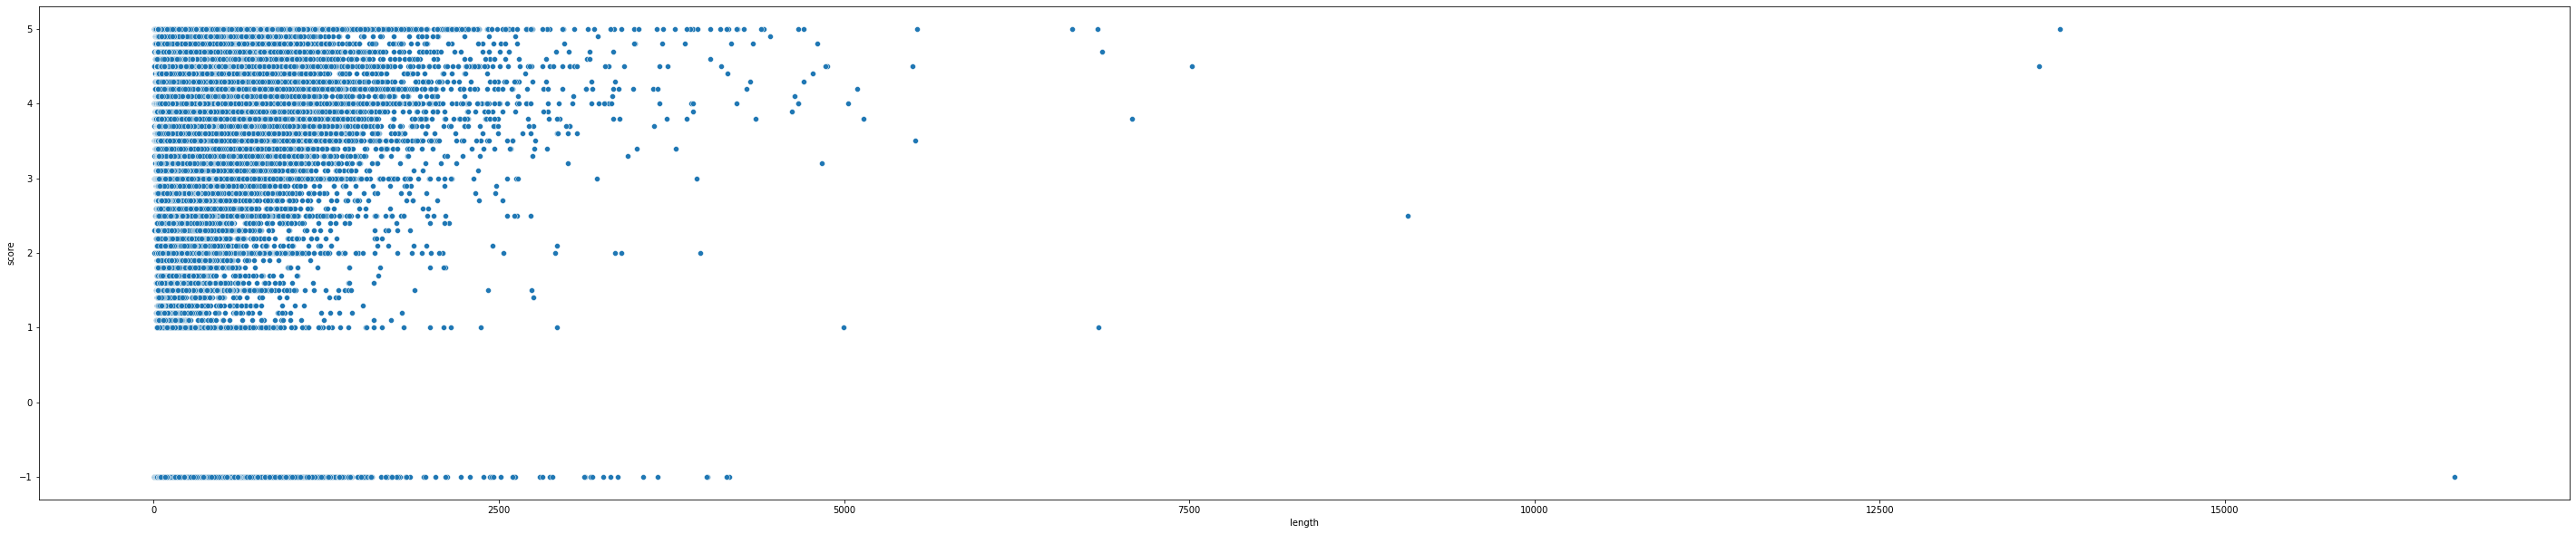

In [121]:
#ÊñáÂ≠óÊï∞„ÇíÂèØË¶ñÂåñ
data["length"] = data["review"].apply(lambda x: len(x))
plt.figure(figsize=(50, 10))
sns.scatterplot(y=data["score"].sort_values(), x=data["length"], palette='mako')

In [126]:
data["review"] = data["review"].apply(extra_preprocess)
data

title  ... length
0       12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...    467
1       12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     91
2       12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...    191
3       12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     45
4       12„É¢„É≥„Ç≠„Éº„Ç∫|Twelve Monkeys  ...     99
...                        ...  ...    ...
484298   ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...    308
484299   ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...     36
484300   ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...    474
484301   ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...    237
484302   ÔºµÔº¶ÔºØ„ÄÄÔºç„Ç™„Éò„Ç¢„ÅÆÊú™Á¢∫Ë™çÈ£õË°åÁâ©‰ΩìÔºç|UFO  ...    135

[467367 rows x 7 columns]

#„Çπ„Ç≥„Ç¢„Çí0.5Âàª„Åø„Å´„Åô„Çã

In [127]:
data = round_score(data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


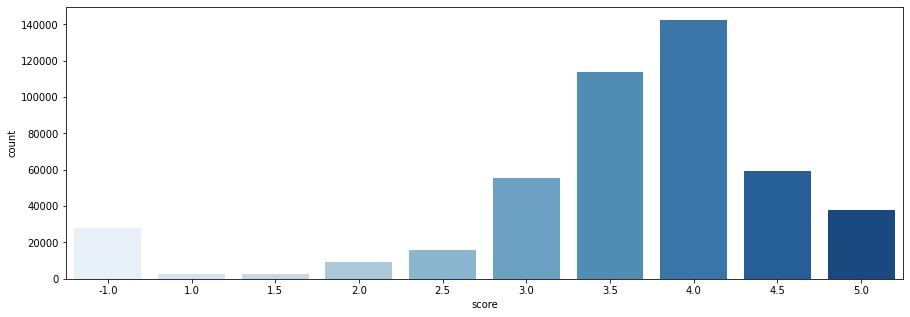

In [128]:
plt.figure(figsize=(15, 5))
sns.countplot(data["score"].sort_values(), palette='Blues')